#**1. Menampilkan data**

In [24]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
print(df1.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#**2. Menangani missing value**

In [5]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## i. delete row

In [6]:
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print(df_no_missing.head(10))
df_no_missing.info()

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0            4.0           35.0    168.0  43.1   
6             3     78.0            5.0           32.0     88.0  31.0   
8             2    197.0            7.0           45.0    543.0   3.5   
13            1    189.0            6.0           23.0    846.0   3.1   
14            5    166.0           72.0           19.0    175.0  25.8   
16            0    118.0           84.0           47.0     23.0  45.8   
18            1     13.0            3.0           38.0     83.0  43.3   
19            1    115.0            7.0            3.0     96.0  34.6   
20            3    126.0           88.0           41.0    235.0  39.3   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8               

##ii. fill with mean

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer

# data form excel
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df1)
df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)
#print
print(df1.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0          6.0    148.0      72.000000      35.000000  105.659898  33.600000   
1          1.0     85.0      66.000000      29.000000  105.659898  26.600000   
2          8.0    183.0      64.000000      25.876155  105.659898  23.300000   
3          1.0     89.0      66.000000      23.000000   94.000000  28.100000   
4          0.0    137.0       4.000000      35.000000  168.000000  43.100000   
5          5.0    116.0      74.000000      25.876155  105.659898  25.600000   
6          3.0     78.0       5.000000      32.000000   88.000000  31.000000   
7         10.0    115.0      55.706685      25.876155  105.659898  35.300000   
8          2.0    197.0       7.000000      45.000000  543.000000   3.500000   
9          8.0    125.0      96.000000      25.876155  105.659898  29.865654   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  

##iii. fill with median

In [8]:
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])

#imputer to replace null with median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df1)

df1 = pd.DataFrame(data=imp.transform(df1), columns=df1.columns)
#print
print(df1.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   
5          5.0    116.0           74.0           27.0     71.0  25.6   
6          3.0     78.0            5.0           32.0     88.0  31.0   
7         10.0    115.0           66.0           27.0     71.0  35.3   
8          2.0    197.0            7.0           45.0    543.0   3.5   
9          8.0    125.0           96.0           27.0     71.0  32.0   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167

In [9]:
df1.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#**3. Menangani noise data**

##i. fungsi untuk menemukan outlier

In [28]:
def find_outliers_tukey(x):
  q1 = x.quantile(.25)
  q3 = x.quantile(.75)
  iqr = q3 - q1
  floor = q1 - 1.5*iqr
  ceiling = q3 + 1.5*iqr
  outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
  outlier_values = list(x[outlier_indices])
  return outlier_indices, outlier_values

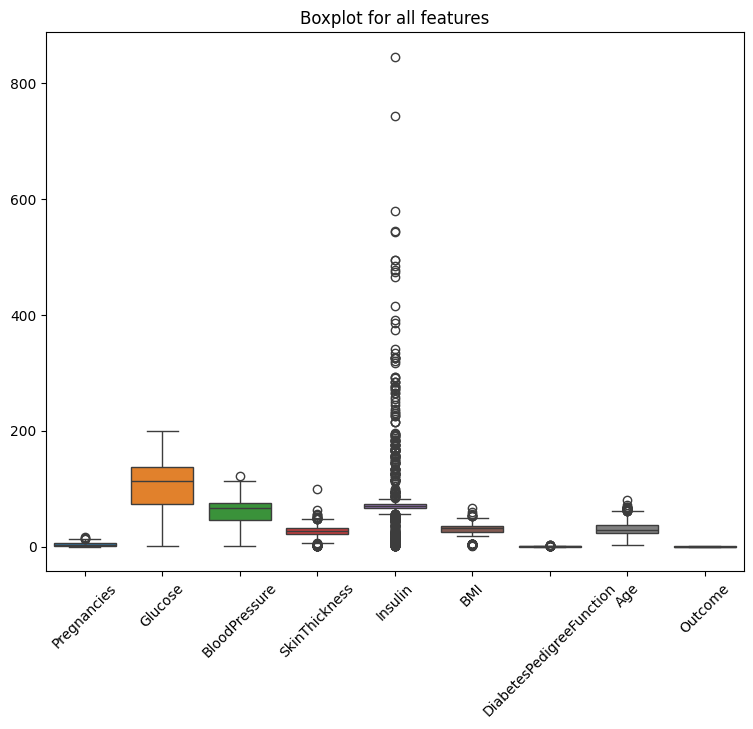

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))
sns.boxplot(data=df1)
plt.title('Boxplot for all features')
plt.xticks(rotation = 45)
plt.show()

##ii. mencari outlier di setiap kolom

In [12]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("Outliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(bp_values))

print("Outliers for SkinThicknes")
st_indices, st_values = find_outliers_tukey(df1['SkinThickness'])
print(np.sort(st_values))

print("Outliers for Insulin")
in_indices, in_values = find_outliers_tukey(df1['Insulin'])
print(np.sort(in_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df1['BMI'])
print(np.sort(bmi_values))

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values = find_outliers_tukey(df1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("Outliers for Age")
age_indices, age_values = find_outliers_tukey(df1['Age'])
print(np.sort(age_values))

Outliers for Glucose
[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   8.   8.   8.   8.   8.   8.   9.   9.   9.   9.   9.
   9.   9.   9.   9.   9.   9.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  12.  12.  12.  12.  12.  12.  12.
  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.
  12.  12.  12.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.
  13.  13.  13.  13.  13.  14.  14.  14.  14.  14.  14.  14.  14.  14.
  14.  14.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.
  16.  16.  16.  16.  16.  17.  17.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.  18.  18.  18.  18.  18.  18.  18.  18.  18.  18.
  18.  18.  18.  18.  18.  18.  18.  18.  19.  19.  19.  19.  19.  19.
  19.  19.  19.  19.  19.  19.  19.  44.  56.  57.  57.  61.  62.  65.
  67.  68.  68.  68.  71.  71.  71.  71.  72. 139. 139. 

### a. menangani outlier dengan menghapus baris

In [13]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
df_del = df1.drop(bp_indices)
print(df_del.head(5))
df1.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
5            5    116.0           74.0            NaN      NaN  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.210    3        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763

### b. mengganti nilai dengan min

In [14]:
min_in = np.min(df_del['Insulin'])
df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])
print(df_del.head(10))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
5             5    116.0           74.0            NaN      NaN  25.6   
7            10    115.0            NaN            NaN      NaN  35.3   
11           10    168.0           74.0            NaN      NaN  38.0   
14            5    166.0           72.0           19.0    175.0  25.8   
15            7      1.0            NaN            NaN      NaN   3.0   
17            7     17.0           74.0            NaN      NaN  29.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627    5        1  
1                      0.351   31        0  
2                      0.672   32        1  
3               

### c. menyimpan data yang telah dihilangkan outliernya

In [15]:
#buat code menyimpan data ke csv setelah data prepocesing di atas
df_del.to_csv('diabetes_preprocessed.csv', index=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#**4. Analisis Korelasi**

## i. heatmap

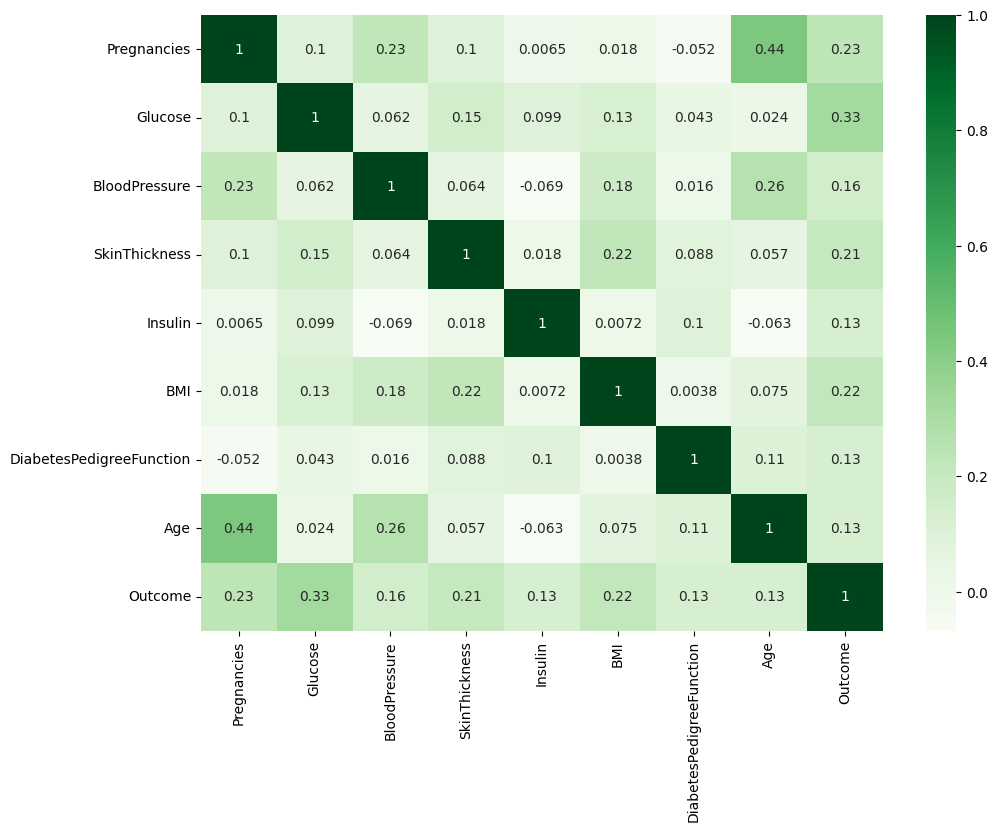

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pyplot

df = pd.DataFrame(df_del)
df = df.iloc[:].copy()
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap='Greens',annot=True)
plt.show()

## ii. visually evaluating correlation

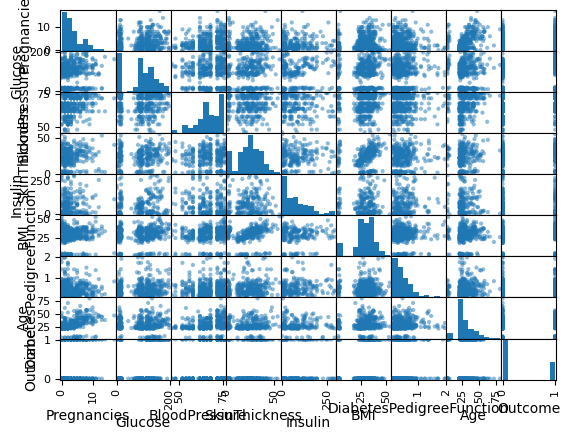

<Figure size 20000x20000 with 0 Axes>

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.figure(figsize=(200, 200))
plt.show()

# **Latihan Mandiri**

dataframe untuk 10 data teratas

In [34]:
import numpy as np
import pandas as pd

df2 = pd.read_csv('data_modul3_TM.csv', na_values=['#NAME?'])
print(df2.head(10))

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
5   45   2.3  24    4.0   2.9  NaN  1.0  1.5   0.4  21.0
6   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0
7   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4  24.0
8   43   2.6  67    4.0   3.8  0.9  2.4  3.7   1.0  21.0
9   32   3.6  28    4.0   3.8  2.0  2.4  3.8   1.0  24.0


info dari
dataset ‘data_modul3_TM.csv’

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     557 non-null    int64  
 1   Urea    556 non-null    float64
 2   Cr      557 non-null    int64  
 3   HbA1c   556 non-null    float64
 4   Chol    557 non-null    float64
 5   TG      553 non-null    float64
 6   HDL     556 non-null    float64
 7   LDL     557 non-null    float64
 8   VLDL    556 non-null    float64
 9   BMI     557 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 43.6 KB


jumlah dari null/kosong.

In [36]:
df2.isnull().sum()

,0
AGE,0
Urea,1
Cr,0
HbA1c,1
Chol,0
TG,4
HDL,1
LDL,0
VLDL,1
BMI,0


Lakukan Handling missing value dengan menghapus row baris

In [37]:
df2 = pd.read_csv('data_modul3_TM.csv', na_values=['#NAME?'])
df2.isnull().sum().sort_values(ascending=False)
df_no_missing = df2.dropna(axis=0)
print(df_no_missing.head(10))
df_no_missing.info()

    AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0    50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1    26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2    50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3    50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4    33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
6    50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0
7    48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4  24.0
8    43   2.6  67    4.0   3.8  0.9  2.4  3.7   1.0  21.0
9    32   3.6  28    4.0   3.8  2.0  2.4  3.8   1.0  24.0
10   31   4.4  55    4.2   3.6  0.7  1.7  1.6   0.3  23.0
<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 556
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     549 non-null    int64  
 1   Urea    549 non-null    float64
 2   Cr      549 non-null    int64  
 3   HbA1c   549 non-null    float64
 4   Chol    549 non-null    float64
 5 

mengisi dengan mean

In [38]:
import numpy as np
from sklearn.impute import SimpleImputer

df2 = pd.read_csv('data_modul3_TM.csv', na_values=['#NAME?'])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df2)
df2 = pd.DataFrame(data=imp.transform(df2), columns=df2.columns)
#print
print(df2.head(10))

    AGE  Urea    Cr  HbA1c  Chol        TG  HDL  LDL  VLDL   BMI
0  50.0   4.7  46.0    4.9   4.2  0.900000  2.4  1.4   0.5  24.0
1  26.0   4.5  62.0    4.9   3.7  1.400000  1.1  2.1   0.6  23.0
2  50.0   4.7  46.0    4.9   4.2  0.900000  2.4  1.4   0.5  24.0
3  50.0   4.7  46.0    4.9   4.2  0.900000  2.4  1.4   0.5  24.0
4  33.0   7.1  46.0    4.9   4.9  1.000000  0.8  2.0   0.4  21.0
5  45.0   2.3  24.0    4.0   2.9  2.094195  1.0  1.5   0.4  21.0
6  50.0   2.0  50.0    4.0   3.6  1.300000  0.9  2.1   0.6  24.0
7  48.0   4.7  47.0    4.0   2.9  0.800000  0.9  1.6   0.4  24.0
8  43.0   2.6  67.0    4.0   3.8  0.900000  2.4  3.7   1.0  21.0
9  32.0   3.6  28.0    4.0   3.8  2.000000  2.4  3.8   1.0  24.0


median yang memiliki missing value

In [39]:
df2 = pd.read_csv('data_modul3_TM.csv', na_values=['#NAME?'])

#imputer to replace null with median
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df2)

df2 = pd.DataFrame(data=imp.transform(df2), columns=df2.columns)
#print
print(df2.head(10))

    AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4  21.0
5  45.0   2.3  24.0    4.0   2.9  1.9  1.0  1.5   0.4  21.0
6  50.0   2.0  50.0    4.0   3.6  1.3  0.9  2.1   0.6  24.0
7  48.0   4.7  47.0    4.0   2.9  0.8  0.9  1.6   0.4  24.0
8  43.0   2.6  67.0    4.0   3.8  0.9  2.4  3.7   1.0  21.0
9  32.0   3.6  28.0    4.0   3.8  2.0  2.4  3.8   1.0  24.0


Tunjukan info dari data yang telah ditanangani
missing value

In [40]:
df2.isnull().sum()

,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0
BMI,0


Simpanlah data CSV hasil dari menghilangkan missing value dengan nama
'data_hasil_TM1.csv'

In [41]:
df_del.to_csv('data_hasil_TM1.csv', index=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     557 non-null    float64
 1   Urea    557 non-null    float64
 2   Cr      557 non-null    float64
 3   HbA1c   557 non-null    float64
 4   Chol    557 non-null    float64
 5   TG      557 non-null    float64
 6   HDL     557 non-null    float64
 7   LDL     557 non-null    float64
 8   VLDL    557 non-null    float64
 9   BMI     557 non-null    float64
dtypes: float64(10)
memory usage: 43.6 KB


Lakukan penanganan noise dengan membangun fungsi outlier dan tampilkan outlier
desetiap kolom.

In [47]:
age_indices, age_values = find_outliers_tukey(df2['AGE'])
print("Outliers for AGE")
print(np.sort(age_values))

print("Outliers for Urea")
ur_indices, ur_values = find_outliers_tukey(df2['Urea'])
print(np.sort(ur_values))

print("Outliers for Cr")
cr_indices, cr_values = find_outliers_tukey(df2['Cr'])
print(np.sort(cr_values))

print("Outliers for Hb")
hb_indices, hb_values = find_outliers_tukey(df2['HbA1c'])
print(np.sort(hb_values))

print("Outliers for Chol")
ch_indices, ch_values = find_outliers_tukey(df2['Chol'])
print(np.sort(ch_values))

print("Outliers for TG")
tg_indices, tg_values = find_outliers_tukey(df2['TG'])
print(np.sort(tg_values))

print("Outliers for HDL")
hdl_indices, hdl_values = find_outliers_tukey(df2['HDL'])
print(np.sort(hdl_values))

print("Outliers for LDL")
ldl_indices, ldl_values = find_outliers_tukey(df2['LDL'])
print(np.sort(ldl_values))

print("Outliers for VLDL")
vldl_indices, vldl_values = find_outliers_tukey(df2['VLDL'])
print(np.sort(vldl_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df2['BMI'])
print(np.sort(bmi_values))

Outliers for AGE
[25. 26. 28. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 31. 31. 31. 31. 31. 31. 31. 73. 73. 73. 73. 73. 73. 77. 77. 77. 77.]
Outliers for Urea
[ 8.9  9.1  9.3  9.3  9.6  9.9  9.9 10.  10.4 10.5 10.5 11.  11.3 11.7
 11.7 13.5 14.  14.1 14.1 14.5 14.5 17.1 20.  20.8 20.8 22.  22. ]
Outliers for Cr
[  6. 120. 123. 130. 132. 136. 136. 145. 146. 146. 159. 159. 159. 175.
 179. 203. 243. 315. 315. 344. 370. 370. 800. 800.]
Outliers for Hb
[13.7 13.7]
Outliers for Chol
[0.  0.5 0.6 0.6 2.  2.  2.  2.  2.  2.  7.3 7.3 7.6 8.5 8.5 8.8 9.3 9.5
 9.5 9.5 9.5 9.8 9.9]
Outliers for TG
[4.4 4.5 4.5 4.6 4.6 4.9 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.3 5.3 5.3 5.3 5.3
 5.3 5.4 5.9 5.9 6.  6.  6.8 6.8]
Outliers for HDL
[ 1.95  1.95  2.    2.    2.1   2.1   2.1   2.3   2.3   2.3   2.4   2.4
  2.4   2.4   2.4   2.4   2.4   2.4   2.5   2.5   2.5   2.5   2.8   3.1
  3.1   3.2   3.2   3.9   4.    6.3   6.6   6.6  11.  ]
Outliers for LDL
[5.5 5.5 5.5 5.6 6.4 7.5 7.9 9.9 9.9]
Outliers 

Setelah mendapatkan nilai Outlier disetiap kolom silahkan lakukan handling Outlier
dengan menghapus baris, jika baris yang dihapus adalah nilai outlier untuk
Urea(UR_indices). Pastikan info dari dataset setelah dihapus!

In [48]:
import numpy as np
import pandas as pd

df2 = pd.read_csv('data_modul3_TM.csv', na_values=['#NAME?'])
df_del = df2.drop(ur_indices)
print(df_del.head(5))
df2.info()

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     557 non-null    int64  
 1   Urea    556 non-null    float64
 2   Cr      557 non-null    int64  
 3   HbA1c   556 non-null    float64
 4   Chol    557 non-null    float64
 5   TG      553 non-null    float64
 6   HDL     556 non-null    float64
 7   LDL     557 non-null    float64
 8   VLDL    556 non-null    float64
 9   BMI     557 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 43.6 KB


Gambarkan BOXPLOT dari
data yang sudah dihapus outlier Urea

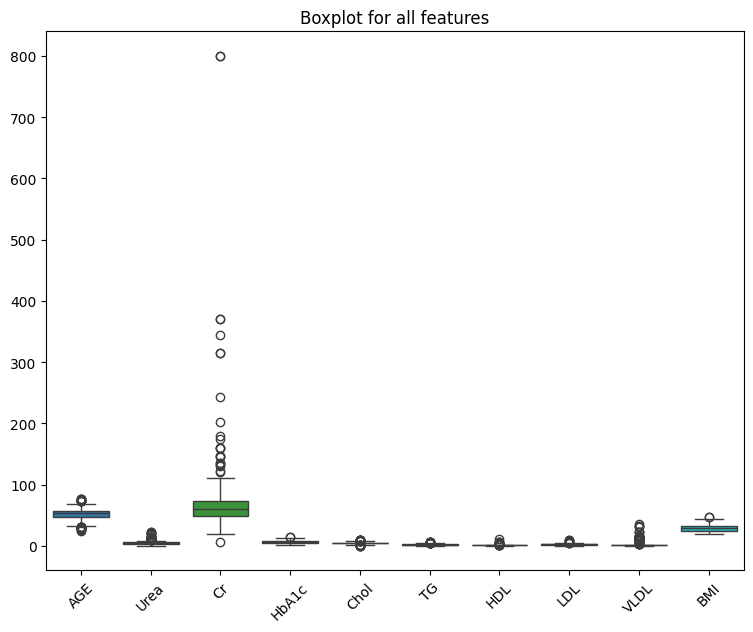

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))
sns.boxplot(data=df2)
plt.title('Boxplot for all features')
plt.xticks(rotation = 45)
plt.show()

lakukan handling outlier lain yaitu dengan menggantikan nilai outlier dengan nilai minimal
di attribute VLDL

In [50]:
min_vldl = np.min(df_del['VLDL'])
df_del['VLDL'] = np.where(df_del['VLDL'] > 321, min_in, df_del['VLDL'])
print(df_del.head(10))

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
5   45   2.3  24    4.0   2.9  NaN  1.0  1.5   0.4  21.0
6   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0
7   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4  24.0
8   43   2.6  67    4.0   3.8  0.9  2.4  3.7   1.0  21.0
9   32   3.6  28    4.0   3.8  2.0  2.4  3.8   1.0  24.0


simpanlah data yang diperoleh dari proses handling dengan nama 'data_hasil_TM2.csv'

In [51]:
df_del.to_csv('data_hasil_TM2.csv', index=False)
df2.info()

Lakukanlah analisis korelasi dengan histogram, heat map dan Scatter plot.

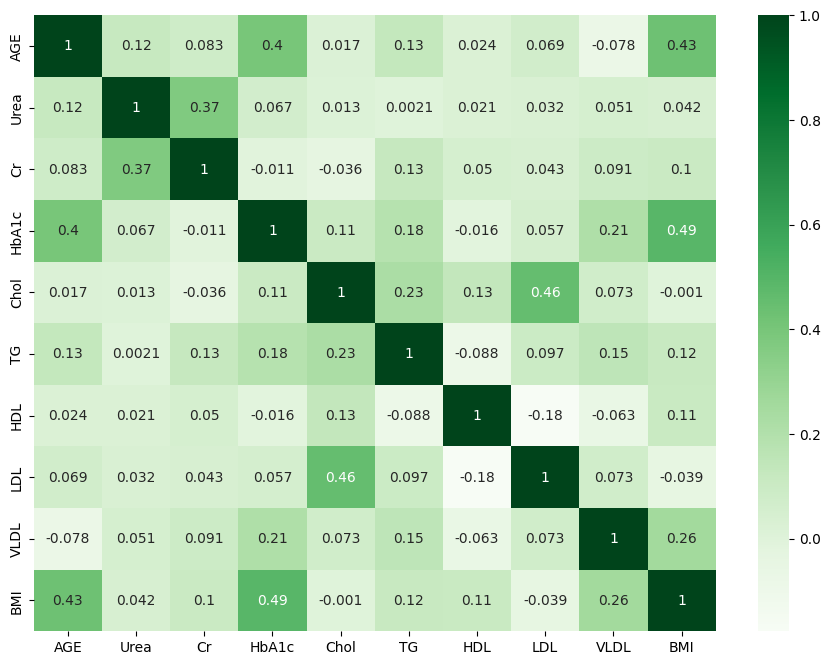

In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pyplot

df = pd.DataFrame(df_del)
df = df.iloc[:].copy()
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap='Greens',annot=True)
plt.show()

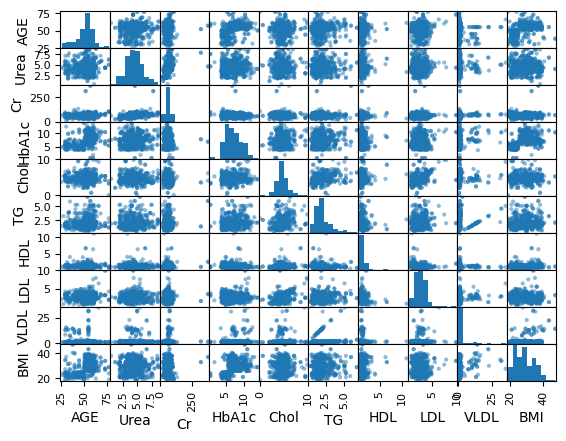

<Figure size 20000x20000 with 0 Axes>

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.figure(figsize=(200, 200))
plt.show()

In [42]:
def find_outliers_tukey(x):
  q1 = x.quantile(.25)
  q3 = x.quantile(.75)
  iqr = q3 - q1
  floor = q1 - 1.5*iqr
  ceiling = q3 + 1.5*iqr
  outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
  outlier_values = list(x[outlier_indices])
  return outlier_indices, outlier_values